<h2 align="center">Automatic Machine Learning with H2O AutoML and Python</h2>

### Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [8]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on = ['ID'])
df = pd.merge(df, subscription_history, on = ['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df = df.drop(['ID'], axis = 1)

### Data Prep & Start H2O

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr7ji7i2o
  JVM stdout: /tmp/tmpr7ji7i2o/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpr7ji7i2o/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,20 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"2 years, 1 month and 8 days !!!"
H2O_cluster_name:,H2O_from_python_rhyme_m6r5uz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [13]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [16]:
train, test = h2o_df.split_frame(ratios = [0.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [17]:
from h2o.automl import H2OAutoML

In [18]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [19]:
aml = H2OAutoML(max_runtime_secs = 600,
               balance_classes = True,
               stopping_metric = 'logloss',
               project_name = 'Final',
               seed = 1
               )

%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 26s, sys: 1.11 s, total: 1min 27s
Wall time: 9min 55s


### AutoML Leaderboard and Ensemble Exploration

In [20]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20220622_192631,0.936052,0.219114,0.629662,0.156214,0.255424,0.0652412
XGBoost_grid__1_AutoML_20220622_192631_model_2,0.934904,0.198108,0.628269,0.15708,0.249403,0.0622018
StackedEnsemble_AllModels_AutoML_20220622_192631,0.933683,0.211309,0.621997,0.164193,0.252862,0.0639393
GBM_grid__1_AutoML_20220622_192631_model_2,0.931723,0.207665,0.614584,0.167635,0.255925,0.0654977
XGBoost_grid__1_AutoML_20220622_192631_model_1,0.931337,0.203991,0.611338,0.174511,0.253199,0.0641098
GBM_grid__1_AutoML_20220622_192631_model_1,0.930459,0.203297,0.605838,0.175422,0.252881,0.063949
XGBoost_3_AutoML_20220622_192631,0.930093,0.205092,0.60744,0.166999,0.252642,0.0638281
GBM_2_AutoML_20220622_192631,0.929982,0.223767,0.601478,0.169727,0.265857,0.0706798
GBM_5_AutoML_20220622_192631,0.929398,0.240434,0.587142,0.159975,0.275695,0.0760075
XGBoost_grid__1_AutoML_20220622_192631_model_4,0.928492,0.214348,0.594917,0.169505,0.258777,0.0669654


In [21]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [22]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20220622_192631_model_2',
  0.9026505082686404,
  1.0,
  0.610662813126549),
 ('GBM_grid__1_AutoML_20220622_192631_model_2',
  0.4453077981735809,
  0.49333357051747384,
  0.3012604659819654),
 ('DeepLearning_1_AutoML_20220622_192631',
  0.09688204160921048,
  0.10733062322763036,
  0.06554282031481048),
 ('GLM_1_AutoML_20220622_192631',
  0.01902297990382854,
  0.021074579507318083,
  0.012869462007397981),
 ('DRF_1_AutoML_20220622_192631',
  0.01428547833463908,
  0.01582614556107638,
  0.009664438569277149),
 ('XRT_1_AutoML_20220622_192631', 0.0, 0.0, 0.0)]

### Base Learner XGBoost Model Exploration

In [23]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20220622_192631_model_2')

In [24]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.062466236281265644
RMSE: 0.24993246344015746
LogLoss: 0.19894637775119692
Mean Per-Class Error: 0.13231976960237835
AUC: 0.9332441858664684
AUCPR: 0.6176382773069108
Gini: 0.8664883717329368

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30175627602471244: 


,,no,yes,Error,Rate
0,no,9193.0,743.0,0.0748,(743.0/9936.0)
1,yes,370.0,930.0,0.2846,(370.0/1300.0)
2,Total,9563.0,1673.0,0.0991,(1113.0/11236.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.301756,0.625631,213.0
1,max f2,0.111132,0.731707,297.0
2,max f0point5,0.396731,0.607618,177.0
3,max accuracy,0.462697,0.909398,153.0
4,max precision,0.985733,1.000000,0.0
5,max recall,0.000291,1.000000,399.0
6,max specificity,0.985733,1.000000,0.0
7,max absolute_mcc,0.265277,0.576550,227.0
8,max min_per_class_accuracy,0.143359,0.862118,281.0
9,max mean_per_class_accuracy,0.111132,0.867680,297.0



Gains/Lift Table: Avg response rate: 11.57 %, avg score: 11.85 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010057,0.881178,6.883867,6.883867,0.796460,0.918188,0.796460,0.918188,0.069231,0.069231,588.386658,588.386658
1,,2,0.020025,0.822991,6.790989,6.837634,0.785714,0.852534,0.791111,0.885507,0.067692,0.136923,579.098901,583.763419
2,,3,0.030082,0.770070,6.271967,6.648521,0.725664,0.794607,0.769231,0.855118,0.063077,0.200000,527.196732,564.852071
3,,4,0.040050,0.720749,5.247582,6.299843,0.607143,0.742757,0.728889,0.827152,0.052308,0.252308,424.758242,529.984274
4,,5,0.050018,0.665864,5.710604,6.182414,0.660714,0.691201,0.715302,0.800059,0.056923,0.309231,471.060440,518.241445
5,,6,0.100036,0.462491,4.598363,5.390389,0.532028,0.562224,0.623665,0.681141,0.230000,0.539231,359.836299,439.038872
6,,7,0.150053,0.297195,3.583340,4.788039,0.414591,0.376640,0.553974,0.579641,0.179231,0.718462,258.333972,378.803905
7,,8,0.200071,0.181319,2.076184,4.110075,0.240214,0.235942,0.475534,0.493716,0.103846,0.822308,107.618396,311.007528
8,,9,0.300018,0.065149,1.169855,3.130583,0.135352,0.111311,0.362207,0.366323,0.116923,0.939231,16.985547,213.058348
9,,10,0.400053,0.029813,0.361410,2.438136,0.041815,0.044725,0.282091,0.285906,0.036154,0.975385,-63.859020,143.813605


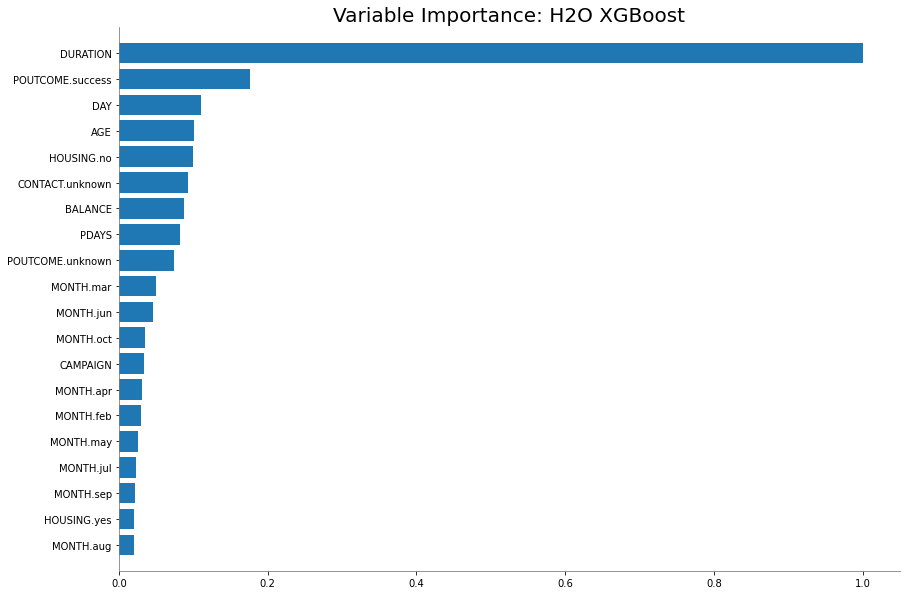

In [25]:
model.varimp_plot(num_of_features = 20)